# Mini-Projeto MLP-CNN
## Centro de Informática da UFPE
### IF702 - Redes Neurais
### Germano Crispim Vasconcelos

14/04/2025

Grupo:
1. Pedro Lima (pbsl@cin.ufpe.br)
2. Pedro de Souza (pbsl@cin.ufpe.br)
3. Pedro Barros (pbsl@cin.ufpe.br)


- Conjunto de classificadores disponíveis:
    - Perceptron multicamadas (MLP)
    - Kolmogorov Arnold Networks (KANs).
    - Modelo Baseado em Transformer (STab) 2024 (em preparação)
    - KAN Transformer (TabKANet) 2024 (em preparação)
    - Random Forest (usado para comparação)
    - Gradient Boosting (usado para comparação)

- Investigar diferentes topologias da rede e diferentes valores
    dos parâmetros (básico):
    - Número de camadas
    - Número de unidades intermediárias
    - Variação da taxa de aprendizagem
    - Função de ativação (logistica, tangent hiperbolica, Relu)
    - Otimização: Adam, Drop-out, Regularização
    - Usar método de amostragem básica (repetitive oversampling)

- Parâmetros adicionais que podem ser explorados:
    - Algoritmo de aprendizagem
    - Taxa de aprendizagem adaptativa
    - Outros

### Preparação de dados (divisão e balanceamento)
- Conjuntos de dados
- Treinamento
    - Validação (separar amostra do Treinamento)
    - Teste (separar amostra do Treinamento)
- Estatisticamente representativos e independentes
    - Nenhuma informação do conjunto de teste pode interferir nos conjuntos de treinamento e validação (ex: identificação do mínimo e máximo para normalização). (vazamento de dados)
    - Não pode haver sobreposição (contaminação)

### Avaliação de Desempenho
- Classificação
    - Teste estatístico Kolmogorov-Smirnov 
        - KS (principal) 
        - MSE (erro médio quadrado)
    - Matriz de confusão
    - Auroc (Área sob a Curva Roc)
    - Recall, Precision e F-Measure

### Experimentos
- Pré-processamento da base de dados
    - Tratamento de dados ausentes, se houver (missing data)
    - Remoção de ruídos (outliers), se houver
    - Remoção de inconsistências, se houver
    - Normalização
    - Codificação
    - Transformação de variáveis
    - Criação de variáveis agregadas
- Importante
    - Registrar o desempenho de forma evolutiva, a cada etapa. Não
    elimine váriáveis no primeiro modelo (a não ser identificadores)

- Recomendação:
    - Iniciar com um modelo MLP e um modelo
    Random Forest
    - Após bom desempenho com esses modelos,
    experimentar os demais
    - KANs, Transformer (tentativo), KAN
    Transformer (tentativo)
    - Gradient boosting.

### Ferramentas para o projeto

- Código em Python
    - https://github.com/RomeroBarata/IF702-redes-neurais

- Pode usar qualquer biblioteca, preocupando-se apenas de garantir que está executando corretamente os experimentos e análise de performance (exemplo, usar função do KS que meça corretamente os valores, comparar com os gráficos dos slides neste ppt)
- Conjuntos de dados do problema
    - Arquivo obtido do Kaggle

### Lições aprendidas

- Comece com uma rede pequena: 1 camada, 10 unidades (a melhor rede é a menor rede que resolve bem o problema: navalha de Occam)
- Definir numero de epocas maximo em 10mil! Usar o critério de parada baseado no Patience (Max Fail = 20)
- Taxas de aprendizagem menores requerem mais tempo mas tendem a gerar melhores resultados
- Fazer backup automático
- Começar cedo, se deixar para ultimo mês, não vai sair!
- Considerar Optuna pode ser uma boa estratégia, caso contrário use gridsearch

### Resultados do projeto

- Apresentação com todos do grupo com estrutura experimental e interpretação dos resultados
- Entrega no final do semestre (PPT e código)

### Dicionário do Dataset: 

Atributos de entrada:
- gender:	Customer's gender (Male/Female)
- SeniorCitizen:	Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
- Partner:	Whether the customer has a partner (Yes/No)
- Dependents:	Whether the customer has dependents (Yes/No)
- tenure:	Number of months the customer has stayed with the company
- PhoneService:	Whether the customer has a phone service (Yes/No)
- MultipleLines:	Whether the customer has multiple phone lines (No, Yes, No phone service)
- InternetService:	Type of internet service (DSL, Fiber optic, No)
- OnlineSecurity:	Whether the customer has online security (Yes, No, No internet service)
- OnlineBackup:	Whether the customer has online backup (Yes, No, No internet service)
- DeviceProtection:	Whether the customer has device protection (Yes, No, No internet service)
- TechSupport:	Whether the customer has tech support (Yes, No, No internet service)
- StreamingTV:	Whether the customer has streaming TV (Yes, No, No internet service)
- StreamingMovies:	Whether the customer has streaming movies (Yes, No, No internet service)
- Contract:	Type of contract (Month-to-month, One year, Two year)
- PaperlessBilling:	Whether the customer has paperless billing (Yes/No)
- PaymentMethod:	Payment method used (Electronic check, Mailed check, Bank transfer, Credit card)
- MonthlyCharges:	Monthly charges the customer pays
- TotalCharges:	Total amount charged to the customer

Atributo alvo:
- Churn:	Whether the customer has churned (Yes/No)

# Imports e Funções

In [ ]:
# Dataset
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from math import log2
from random import randint
%matplotlib inline

In [ ]:
# Modelos
from sklearn.neural_network import MLPClassifier
from kan import KAN, KANClassifier # KANClassifier é uma classe feita por mim, da meu fork da biblioteca do pykan no github
# [STab]
# [KAN Transformer]
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
'''import xgboost as xgblib
from xgboost import XGBClassifier'''

# Ferramentas de ML
#import joblib
import mlflow
import mlflow.sklearn
import logging
from sklearn.model_selection import GridSearchCV

# Avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

# Explicabilidade
import scikitplot as skplt
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay as pdp
from lime import lime_tabular
%matplotlib inline

Funções tiradas dos scripts disponibilizados:

In [ ]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

Funções minhas:

In [ ]:
def pfi(model, x, y, name=None):
    result = permutation_importance(model, x, y,n_repeats=30, random_state=0)

    #cols = [f"[{i}] - {x.columns[i]}" for i in range(len(x.columns))]

    cols = ['[0] sex', '[1] age', '[2] creat.plsm.creat', '[3] dim.d.p.d.d.quant', '[4] hemgrm.eos.%',
        '[5] hemgrm.hemgb', '[6] hemgrm.leuc', '[7] hemgrm.linf.%', '[8] hemgrm.mono.%',
        '[9] hemgrm.neut.%', '[10] hemgrm.plaq', '[11] pot.pot', '[12] prot.c.r.plsm', '[13] sod.sod',
        '[14] tgo.ast.tgo', '[15] tpg.alt.tgp', '[16] ureia.plsm.ureia']

    importances = pd.Series(result.importances_mean, index=cols)

    fig, ax = plt.subplots()

    importances.plot.bar(yerr=result.importances_std, ax=ax)

    if(name):
        ax.set_title(f"Feature importances on {name} model")
    else:
        name = str(model)
        i = name.find('(')
        ax.set_title(f"Feature importances on {name[:i]} model")
    ax.set_ylabel("Mean performance decrease")
    fig.tight_layout()
    plt.show()

# Dataset

In [32]:
df = pd.read_csv('customer_churn_telecom_services.csv', header=0)
print('Nº de instâncias:', len(df))
df.head()

Nº de instâncias: 7043


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise inicial (1)

In [4]:
# Tipos das colunas
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
# Quantiade de valores únicos por coluna
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Nenhuma coluna precisa ser removida, não há atributos identificadores.

In [66]:
# Quantiades de cada valor único por coluna
nmrc_cols = []
cat_cols = []

for col in df.drop(columns=['Churn']).columns:
    unique_values = df[col].value_counts()
    if(len(unique_values) <= 4):
        print(unique_values, '\n')
        df[col] = df[col].astype('category')
        cat_cols.append(col)
    else:
        nmrc_cols.append(col)

gender
Male      3555
Female    3488
Name: count, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64 

TechSupport
No                     3473
Yes                    2044
No internet ser

In [70]:
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [67]:
# Procurando valores nulos
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Apenas a coluna TotalCharges (valor total cobrado ao cliente) possui valores nulos.

In [68]:
# Número de valores nulos
df['TotalCharges'].isna().sum()

11

Pela quantidade, pode-se usar um KNNImputer ou trocar pelo valor mediano da coluna.

In [ ]:
df_old = df.copy()
#df = df_old.copy()

## Divisão dos folds (2)

In [12]:
seed = randint(0, 4294967295)
print(seed)

745253194


In [96]:
colors = {0:'red', 1:'blue', 'No':'red', 'Yes':'blue'}

In [71]:
#df_no_churn = df[df['Churn']==0]
#df_churn = df[df["Churn"]==1]

churn_f1, churn_f3 = train_test_split(df[df["Churn"]=="Yes"], test_size=1/3, shuffle=True, random_state=seed)
churn_f1, churn_f2 = train_test_split(churn_f1, test_size=0.5, shuffle=True, random_state=seed)

print(len(churn_f1), len(churn_f2), len(churn_f3))

nochurn_f1, nochurn_f3 = train_test_split(df[df["Churn"]=="No"], test_size=1/3, shuffle=True, random_state=seed)
nochurn_f1, nochurn_f2 = train_test_split(nochurn_f1, test_size=0.5, shuffle=True, random_state=seed)

print(len(nochurn_f1), len(nochurn_f2), len(nochurn_f3))

623 623 623
1724 1725 1725


In [72]:
# Junção dos folds
fold1 = pd.concat([churn_f1, nochurn_f1])
fold2 = pd.concat([churn_f2, nochurn_f2])
fold3 = pd.concat([churn_f3, nochurn_f3])
print(len(fold1), len(fold2), len(fold3))

2347 2348 2348


## Fold1 como conjunto de Treinamento

In [73]:
df_train1 = fold1.copy()
df_val1 = fold2.copy()
df_test1 = fold3.copy()

### EDA (3-4)

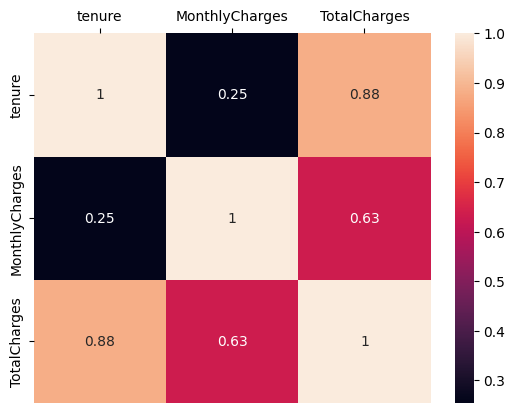

In [76]:
#plt.figure(figsize=(20,10))
hm = sns.heatmap(df_train1[nmrc_cols].corr(method='spearman'), annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.show()

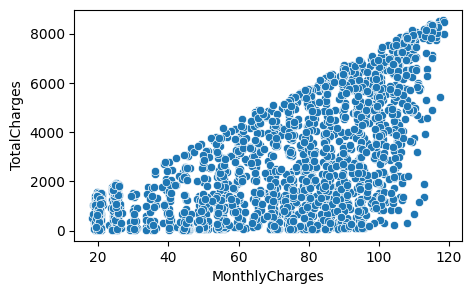

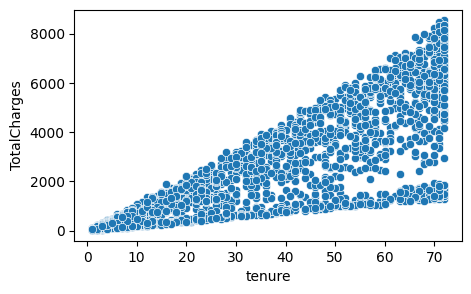

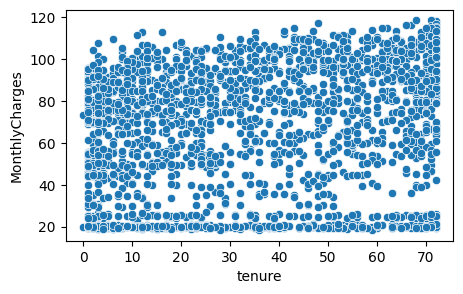

In [77]:
plt.figure(figsize=(5,3))
sns.scatterplot(df_train1, y='TotalCharges', x='MonthlyCharges')
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(df_train1, y='TotalCharges', x='tenure')
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(df_train1, y='MonthlyCharges', x='tenure')
plt.show()

Os gráficos mostram mais claramente a correlação entre as variáveis numéricas indicada no mapa de calor. Apesar do tempo de estadia do cliente com a companhia (tenure) e a cobrança mensal (MonthlyCharges) estarem diretamente relacionados com o total de cobranças, não há uma correlação forte ou concreta entre a cobrança mensal e o tempo de estadia. 

In [78]:
teste = df_train1.loc[df_train1['TotalCharges'].notna(), ['tenure', 'MonthlyCharges', 'TotalCharges']]
print(np.sqrt(mse(teste['TotalCharges'], (teste['MonthlyCharges'] * teste['tenure']))))
teste = teste.assign(mult = (teste['MonthlyCharges'] * teste['tenure']) == teste['TotalCharges'])
teste

68.00902271445821


,tenure,MonthlyCharges,TotalCharges,mult
3527,1,74.60,74.60,True
3467,5,91.40,449.75,False
6240,1,93.30,93.30,True
1338,1,20.15,20.15,True
5133,24,104.25,2433.90,False
...,...,...,...,...
4635,40,20.15,777.35,False
1206,3,70.15,194.20,False
1055,36,19.55,620.75,False
3693,37,64.65,2347.85,False


Apesar de ser uma possibilidade, não dá para confiar 100% em inputar os valores ausentes em TotalCharges como sendo simplesmente a multiplicação de MonthlyCharges e tenure, pois alguns clientes receberam descontos nos pagamentos das mensalidades, aparentemente.

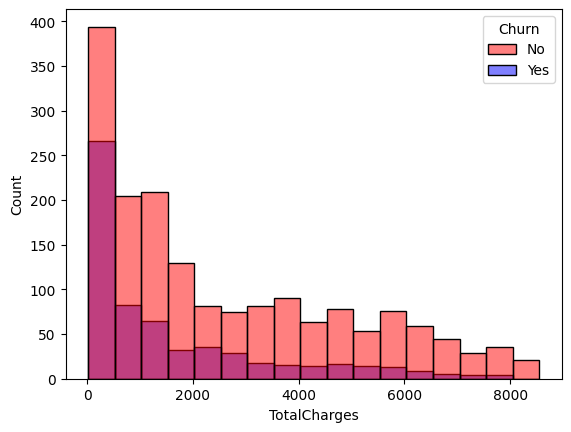

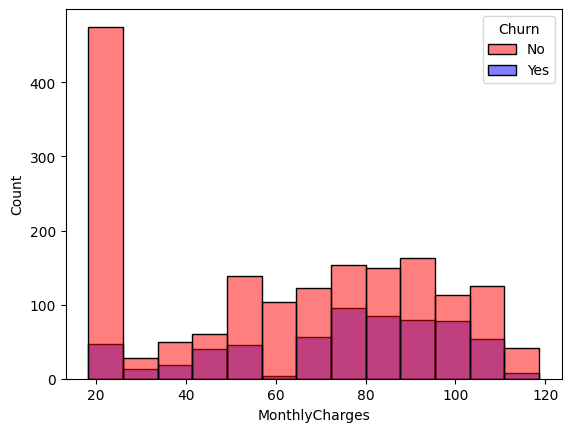

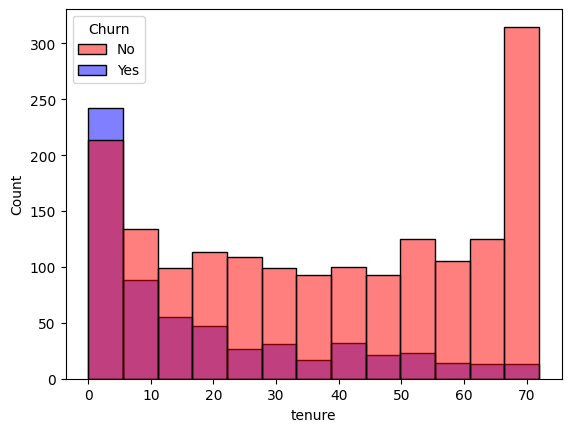

In [97]:
sns.histplot(df_train1, x='TotalCharges', hue='Churn', palette=colors)
plt.show()
sns.histplot(df_train1, x='MonthlyCharges', hue='Churn', palette=colors)
plt.show()
sns.histplot(df_train1, x='tenure', hue='Churn', palette=colors)
plt.show()

O único indicativo de churn dos clientes entre os gráficos motrados, é que o churning dos clientes normalmente acontece no início da relação cliente-companhia, e quanto mais tempo se passa do cliente na companhia, menor a chance dele desistir dela.

---

In [113]:
total = len(df_train1)
for col in cat_cols:
    print(col + ':')
    print('  \tNo\tYes\t(Total)')
    for v in df_train1[col].cat.categories:
        print(f'{v}\t{(len(df_train1[(df_train1[col] == v) & (df_train1["Churn"] == "No")])/total):.2f}\t{(len(df_train1[(df_train1[col] == v) & (df_train1["Churn"] == "Yes")])/total):.2f}\t({len(df_train1[(df_train1[col] == v)])})')
    print()

gender:
  	No	Yes	(Total)
Female	0.35	0.13	(1133)
Male	0.38	0.13	(1214)

SeniorCitizen:
  	No	Yes	(Total)
0	0.64	0.19	(1956)
1	0.10	0.07	(391)

Partner:
  	No	Yes	(Total)
No	0.35	0.17	(1211)
Yes	0.39	0.10	(1136)

Dependents:
  	No	Yes	(Total)
No	0.48	0.22	(1628)
Yes	0.26	0.05	(719)

PhoneService:
  	No	Yes	(Total)
No	0.08	0.02	(235)
Yes	0.66	0.24	(2112)

MultipleLines:
  	No	Yes	(Total)
No	0.35	0.12	(1120)
No phone service	0.08	0.02	(235)
Yes	0.31	0.12	(992)

InternetService:
  	No	Yes	(Total)
DSL	0.28	0.06	(801)
Fiber optic	0.26	0.18	(1047)
No	0.20	0.02	(499)

OnlineSecurity:
  	No	Yes	(Total)
No	0.30	0.21	(1188)
No internet service	0.20	0.02	(499)
Yes	0.24	0.04	(660)

OnlineBackup:
  	No	Yes	(Total)
No	0.26	0.18	(1043)
No internet service	0.20	0.02	(499)
Yes	0.28	0.07	(805)

DeviceProtection:
  	No	Yes	(Total)
No	0.28	0.18	(1075)
No internet service	0.20	0.02	(499)
Yes	0.26	0.07	(773)

TechSupport:
  	No	Yes	(Total)
No	0.29	0.21	(1167)
No internet service	0.20	0.02	(499)
Yes	0.25	0.0

Com esses dados, podemos tirar algumas conclusões e hipóteses:
- Entre um cliente idoso e um que não é, é mais provável que o cliente idoso faça churn com a empresa.
    - Idosos tendem a se manter na empresa, as vezes por não entender como as coisas funcionam, ou por não sentir necessidade, ou por terem outras prioridades. 
- Um cliente idoso tem maior probabilidade de cometer churn com a empresa do que um cliente que não é.
- Apenas cerca de 10% dos clientes que não possuem serviços de internet tendem a cometer churn. Que é uma taxa menor do que aqueles que pagam por internet.
    - Relação provável com idosos.
    - Possivelmente as diferenças entre os planos de celulares entre diferentes empresas são relacionadas a serviços de internet, então talvez não haja necessidade de mudança de uma empresa para a outra.
- Em geral, clientes que pagam por serviço de internet mas que não fazem uso de algum serviço adicional possuem uma maior probabilidade de cometer churn do que alguém que usa o respectivo serviço. Por exemplo, alguém que escolhe não ter acesso a suporte técnico, mesmo com serviço de internet, contra um cliente que possui.
    - Aqueles clientes que já desfrutam de serviços adicionais pela empresa têm mais a perder se saírem do plano. 
    - O uso desses serviços extras também podem estar mais relacionados com a satifação do cliente.
- Clientes que possuem um contrato mensal com a empresa são muito mais prováveis de cometer churn, comparado a clientes com outros tipos de contratos (anualmente e bianualmente)
    - O pagamento mensal já é um prelúdio para uma falta de comprometimento, ou para uma saída fácil. O pagamento mensal também dá a chance do cliente pensar na sua relação com a empresa mais frequentemente do que clientes com contratos prolongados, assim tendo uma maior chance da insatisfação do cliente coincidir com a data do pagamento.
- Clientes que usam cheque eletrônico para o pagamento do contrato também são muito mais prováveis de cometer churn, em comparação com outros métodos (transferência bancária automática, cobrança automática no cartão de crédito e cheque físico)
    - Cobrança automática normalmente causa uma retenção maior de clientes, já que o próprio pensamento do pagamento da conta é esquecido, ao invés de enfatizado.
    - Já cheque físico pode ser utilizado mais por idosos.

### Manipulação do Dataset (4-6)

Tratamento de outliers:

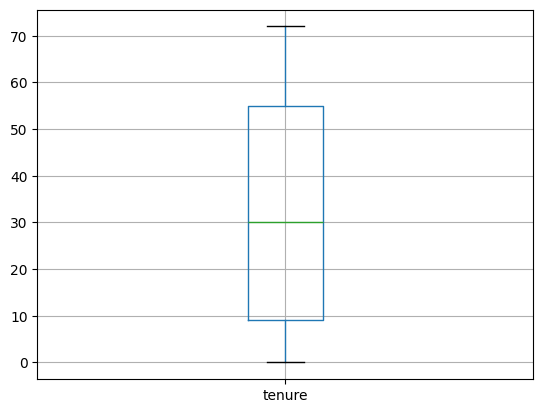

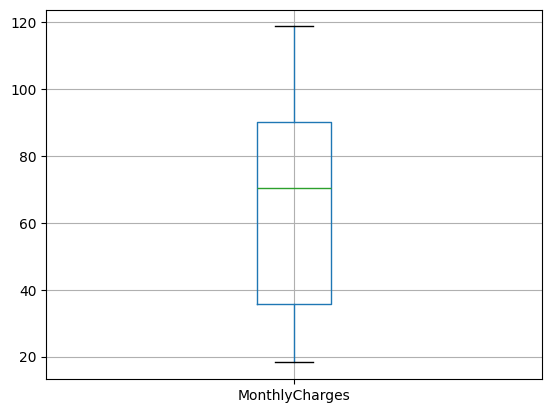

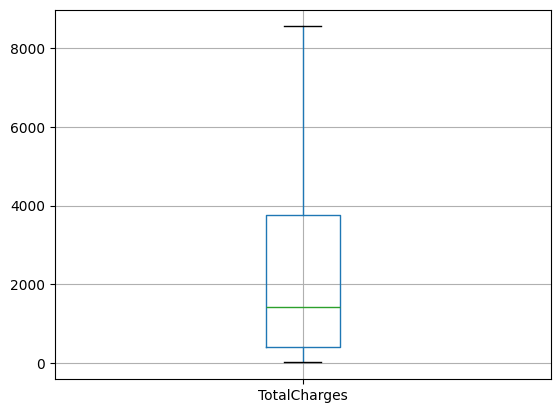

In [116]:
for col in nmrc_cols:
    df_train1[[col]].boxplot()
    plt.show()

Sem outliers nas variáveis numéricas.

---
Tratamento de dados ausentes:

In [119]:
# Procurando valores nulos
df_train1.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [120]:
# Número de valores nulos
df_train1['TotalCharges'].isna().sum()

2

In [ ]:
# KNNInputer pode ser melhor

---
Dados duplicados:

In [124]:
df_train1[df_train1.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3499,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.90,Yes
4476,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.90,20.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
5506,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No


Realmente precisa tirar essas instâncias? As duplicatas são muito poucas e genéricas o suficiente para poderem ser consideradas como clientes reais, ao invés de ser um erro na anotação dos dados.

---
Codificação de dados categóricos:

In [ ]:
# Alterando colunas categóricas binárias para int

df_train1['gender'] = df_train1['gender'].apply(lambda x: 0 if x=='Male' else 1)

cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df_train1[df_train1[cols]=='No'] = 0
df_train1[df_train1[cols]=='Yes'] = 1
df_train1.head()

---
Normalização:

In [ ]:
# Normalização no conjunto de treinamento
scaler = MinMaxScaler()

df_train1.loc[:,nmrc_cols] = scaler.fit_transform(df_train1.loc[:,nmrc_cols], df_train1['Churn'])

# Normalização nos conjuntos de validação e teste, com base nos dados de treinamento
df_val1.loc[:,nmrc_cols] = scaler.fit_transform(df_val1.loc[:,nmrc_cols], df_val1['Churn'])
df_test1.loc[:,nmrc_cols] = scaler.fit_transform(df_test1.loc[:,nmrc_cols], df_test1['Churn'])

## Fold2 como conjunto de Treinamento

In [126]:
df_train2 = fold2.copy()
df_val2 = fold3.copy()
df_test2 = fold1.copy()

### EDA

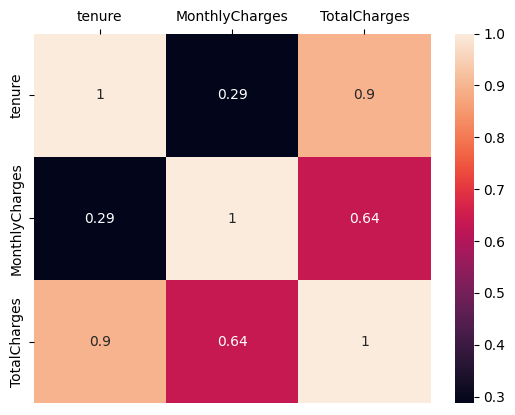

In [127]:
#plt.figure(figsize=(20,10))
hm = sns.heatmap(df_train2[nmrc_cols].corr(method='spearman'), annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.show()

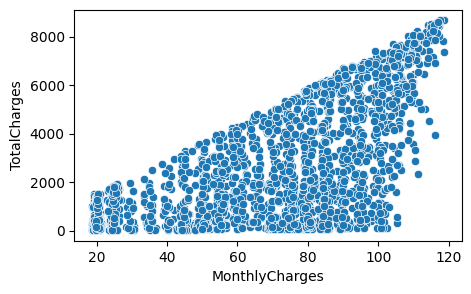

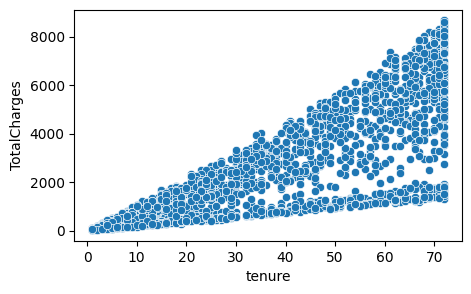

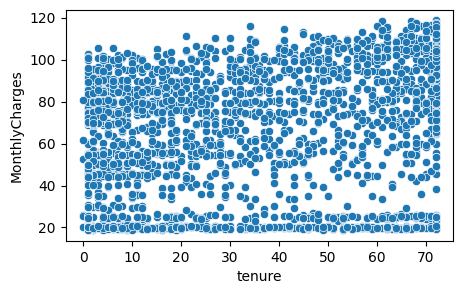

In [129]:
plt.figure(figsize=(5,3))
sns.scatterplot(df_train2, y='TotalCharges', x='MonthlyCharges')
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(df_train2, y='TotalCharges', x='tenure')
plt.show()
plt.figure(figsize=(5,3))
sns.scatterplot(df_train2, y='MonthlyCharges', x='tenure')
plt.show()

In [130]:
teste = df_train2.loc[df_train2['TotalCharges'].notna(), ['tenure', 'MonthlyCharges', 'TotalCharges']]
print(np.sqrt(mse(teste['TotalCharges'], (teste['MonthlyCharges'] * teste['tenure']))))
teste = teste.assign(mult = (teste['MonthlyCharges'] * teste['tenure']) == teste['TotalCharges'])
teste

65.75078923652782


,tenure,MonthlyCharges,TotalCharges,mult
5090,7,94.70,673.10,False
5697,70,109.50,7674.55,False
515,40,104.80,4131.95,False
1410,2,93.85,170.85,False
6831,7,86.80,620.35,False
...,...,...,...,...
2657,29,66.10,1912.15,False
1815,72,20.50,1502.25,False
4116,20,19.70,395.60,False
5365,62,20.00,1250.10,False


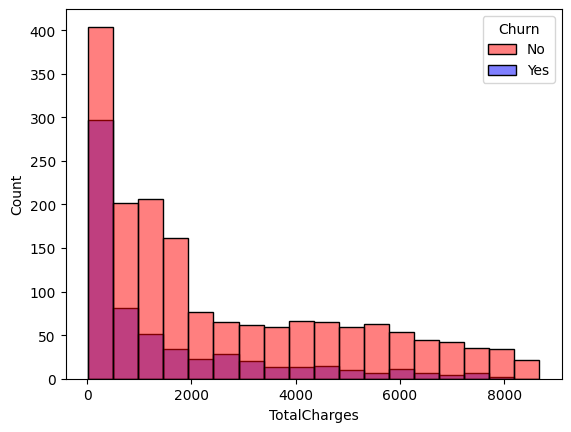

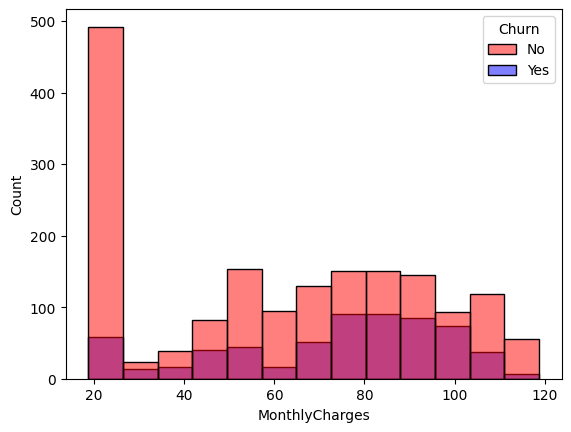

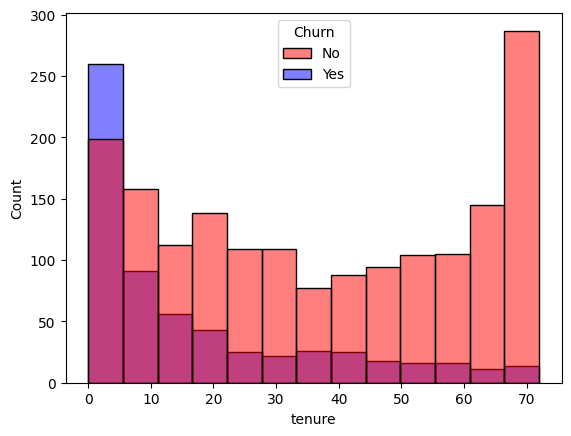

In [132]:
sns.histplot(df_train2, x='TotalCharges', hue='Churn', palette=colors)
plt.show()
sns.histplot(df_train2, x='MonthlyCharges', hue='Churn', palette=colors)
plt.show()
sns.histplot(df_train2, x='tenure', hue='Churn', palette=colors)
plt.show()

---

In [133]:
total = len(df_train2)
for col in cat_cols:
    print(col + ':')
    print('  \tNo\tYes\t(Total)')
    for v in df_train2[col].cat.categories:
        print(f'{v}\t{(len(df_train2[(df_train2[col] == v) & (df_train2["Churn"] == "No")])/total):.2f}\t{(len(df_train2[(df_train2[col] == v) & (df_train2["Churn"] == "Yes")])/total):.2f}\t({len(df_train2[(df_train2[col] == v)])})')
    print()

gender:
  	No	Yes	(Total)
Female	0.36	0.13	(1150)
Male	0.38	0.13	(1198)

SeniorCitizen:
  	No	Yes	(Total)
0	0.63	0.20	(1964)
1	0.10	0.06	(384)

Partner:
  	No	Yes	(Total)
No	0.35	0.17	(1226)
Yes	0.38	0.09	(1122)

Dependents:
  	No	Yes	(Total)
No	0.48	0.22	(1656)
Yes	0.25	0.04	(692)

PhoneService:
  	No	Yes	(Total)
No	0.07	0.03	(230)
Yes	0.66	0.24	(2118)

MultipleLines:
  	No	Yes	(Total)
No	0.37	0.12	(1150)
No phone service	0.07	0.03	(230)
Yes	0.29	0.12	(968)

InternetService:
  	No	Yes	(Total)
DSL	0.28	0.07	(825)
Fiber optic	0.25	0.18	(996)
No	0.21	0.02	(527)

OnlineSecurity:
  	No	Yes	(Total)
No	0.28	0.20	(1122)
No internet service	0.21	0.02	(527)
Yes	0.25	0.05	(699)

OnlineBackup:
  	No	Yes	(Total)
No	0.27	0.17	(1025)
No internet service	0.21	0.02	(527)
Yes	0.26	0.08	(796)

DeviceProtection:
  	No	Yes	(Total)
No	0.26	0.17	(991)
No internet service	0.21	0.02	(527)
Yes	0.27	0.08	(830)

TechSupport:
  	No	Yes	(Total)
No	0.29	0.20	(1155)
No internet service	0.21	0.02	(527)
Yes	0.24	0.04	

### Manipulação do Dataset (4-6)

Tratamento de outliers:

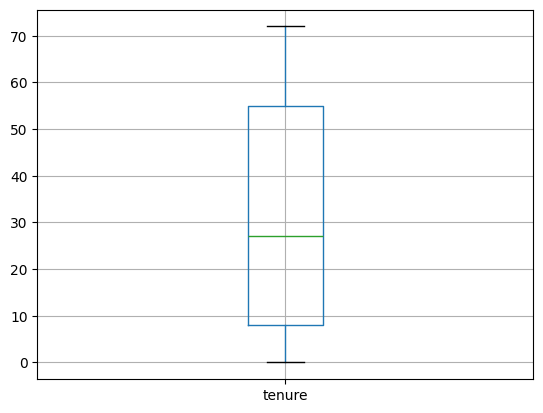

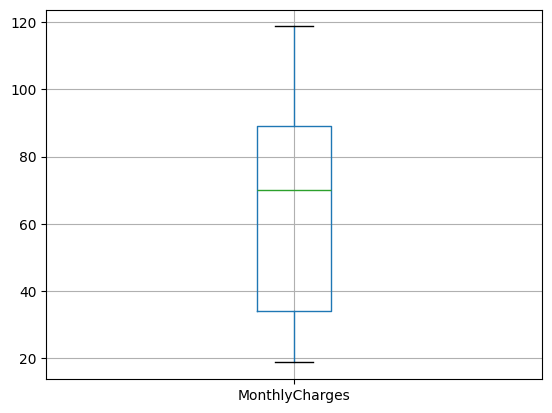

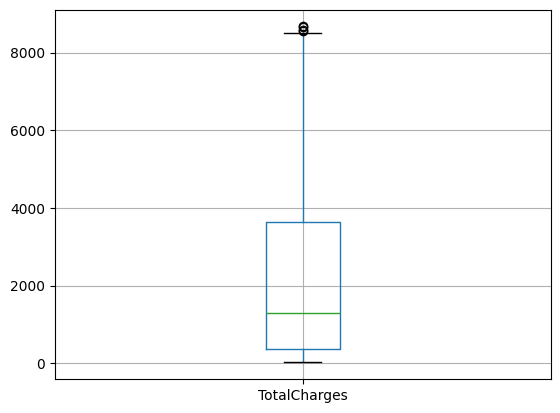

In [134]:
for col in nmrc_cols:
    df_train2[[col]].boxplot()
    plt.show()

Poucos outliers na variável numérica TotalCharges

---
Tratamento de dados ausentes:

In [135]:
# Procurando valores nulos
df_train2.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [137]:
# Número de valores nulos
df_train2['TotalCharges'].isna().sum()

6

In [ ]:
# KNNInputer pode ser melhor

---
Dados duplicados:

In [139]:
df_train2[df_train2.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6518,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
2033,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
5736,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
2121,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No


---
Codificação de dados categóricos:

In [ ]:
# Alterando colunas categóricas binárias para int

df_train2['gender'] = df_train2['gender'].apply(lambda x: 0 if x=='Male' else 1)

cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df_train2[df_train2[cols]=='No'] = 0
df_train2[df_train2[cols]=='Yes'] = 1
df_train2.head()

---
Normalização:

## Fold3 como conjunto de Treinamento

In [138]:
df_train3 = fold3.copy()
df_val3 = fold1.copy()
df_test3 = fold2.copy()

### EDA

### Manipulação do Dataset

# Modelos de ML
Treinamento, teste e avaliações

### Multi-Layer Perceptron

- hidden_layer_sizes (estrura da rede)
- activation (função de ativação)
- solver* (algoritmo de aprendizagem/otimizador)
- learning_rate_init (taxa de aprendizado)
- learning_rate* (taxa de aprendizado fixa ou adaptativa)
- alpha (regularização L1)
- max_iter = 10000 (número máximo de épocas)
- early_stopping = True (usar early stopping)
- n_iter_no_change = 20 (paciência)
- shuffle = True
- random_state = seed

* = opcional

In [ ]:
mlp = MLPClassifier()#.fit(X_train, y_train)

### Kolmogorov-Arnold Network

- width (estrutura da rede)
- grid (número de intervalos do grid)
- k (ordem do spline)
- random_state = seed
- lr (taxa de aprendizado)
- steps (número de épocas)
- opt* (algoritmo de aprendizagem/otimizador)

* = opcional

In [ ]:
kanet = KANClassifier()#.fit(X_train, y_train)

### STab

### TabKANet

### Random Forest

In [ ]:
rforest = RandomForestClassifier()#.fit(X_train, y_train)

In [ ]:
RandomForestClassifier().fit()

### Grandient Boosting

In [ ]:
gboost = GradientBoostingClassifier()#.fit(X_train, y_train)

#### XGBoost

In [ ]:
#xgb = XGBClassifier.fit(X_train, y_train)

#### Caso queira usar a biblioteca da KAN (pykan) original:

In [ ]:
'''from kan import *
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_is_fitted

# Função de perda:
class kanLoss(torch.nn.CrossEntropyLoss):
  def forward(self, input, target):
        return super().forward(input.type(torch.float64), target.type(torch.long))

# Classe do modelo KAN: (TODO: Maybe change the declare args so the base KAN model is declared inside the KANClassifier?)
class KANClassifier(BaseEstimator):
    #Classe para o modelo KAN, para que se pareça mais com outras classes de
    #modelos de AM do scikit-learn

    #Parâmetros:
    #- model: modelo original da classe MultKAN() | KAN()

    #Exp.: KANnet(KAN(width=[2,2], grid=3, k=3))
    
    def __init__(self, model:KAN) -> None:
       self.model = model
       self._estimator_type = "classifier"
       self.data = {}
       self.results = {}
       self.accuracy = None
       self.precision = None
       self.recall = None

    def get_params(self, deep=False):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {"width": self.model.width, "grid": self.model.grid, "k": self.model.k}

    # Transformação de dataset:
    def __dt4kan(self, datarray):
        if isinstance(datarray, np.ndarray):
            return torch.from_numpy(datarray).float()
        elif isinstance(datarray, torch.Tensor):
            return datarray
        return torch.from_numpy(np.array(datarray)).float()

    # Métricas
    def train_acc(self):
        return torch.mean((torch.argmax(self.model(self.data['train_input']), dim=1) == self.data['train_label']).float())

    def test_acc(self):
        return torch.mean((torch.argmax(self.model(self.data['test_input']), dim=1) == self.data['test_label']).float())

    def test_prec(self, lbl = 1):
        p_hat = (torch.argmax(torch.softmax(self.model(self.data['test_input']), dim=1), dim=1) == lbl)
        vp = (p_hat & (self.data['test_label'].float() == lbl))
        return (vp.sum()/p_hat.sum()).float()

    def test_recall(self):
        p = (self.data['test_label'] == 1)
        vp = (p & (torch.argmax(torch.softmax(self.model(self.data['test_input']), dim=1), dim=1) == 1))
        return (vp.sum()/p.sum()).float()

    # Fit
    # TODO: 
    # - Include all arguments of the original fit function from MultKAN
    # - Add possibility of adding other metrics (?)
    def fit(self, dataset:dict, opt="LBFGS", steps:int=20, loss_fn=kanLoss()):
        #Função de treinamento do modelo KAN

        #Parâmetros:
        #- dataset: <dict[Tensor]> que deve ter as seguintes chaves:
        #    - "train_input"
        #    - "train_label"
        #    - "test_input"
        #    - "test_label"

        #- opt: ...
        #- steps: ...
        #- loss_fn: ...
        
        self.is_fitted_ = True
        self.data = dataset
        self.classes_ = self.data['train_label'].unique()

        self.results = self.model.fit(self.data,
                                      opt=opt,
                                      steps=steps,
                                      metrics=(self.train_acc,
                                               self.test_acc,
                                               self.test_prec,
                                               self.test_recall),
                                      loss_fn=loss_fn)
        self.accuracy, self.precision, self.recall = self.results['test_acc'][-1], self.results['test_prec'][-1], self.results['test_recall'][-1]
        self.classes_ = np.array([i for i in range(self.predict_proba(self.data['test_input'][:2]).shape[1])])
        return self

    # Predições:
    def predict(self, new_data:torch.Tensor | np.ndarray) -> np.ndarray:
        sklearn.utils.validation.check_is_fitted(self)
        new_data = self.__dt4kan(new_data)
        return torch.argmax(torch.softmax(self.model(new_data), dim=1), dim=1).detach().numpy()

    def predict_proba(self, new_data:torch.Tensor | np.ndarray) -> np.ndarray:
        new_data = self.__dt4kan(new_data)
        return torch.softmax(self.model(new_data), dim=1).detach().numpy()

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    # Plotting:
    def plot(self, beta=100):
        self.model.plot(beta=beta) # não sei para que serve o beta

    # TODO: Change this function to return the figure, instead of just showing it right away
    def plot_metric(self, metric:str):
        if(metric not in ('loss', 'train_loss', 'test_loss', 'acc', 'train_acc', 'test_acc', 'test_prec', 'test_recall')):
            raise ValueError(f"'{metric}' isn't a valid plottable metrics, which are: 'loss', 'train_loss', 'test_loss', 'acc', 'train_acc', 'test_acc', 'test_prec', 'test_recall'")

        if((metric == 'loss') or (metric == 'acc')):
            plot0 = [float(x) for x in self.results['train_'+metric]]
            plot1 = [float(x) for x in self.results['test_'+metric]]
            sns.lineplot(y=plot0, x=range(1, len(plot0) + 1))
        else:
            plot1 = [float(x) for x in self.results[metric]]
        sns.lineplot(y=plot1, x=range(1, len(plot1) + 1))

        title = metric
        if(title[-3:] == 'acc'):
            title += 'uracy'
        if(title[0] == 't'):
            if(title[-4:] == 'prec'):
                title += 'ision'
            i = title.index('_')
            title = f'{title[i+1:]} ({title[:i]})'
        plt.title(title.capitalize())

        plt.show()
'''